In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the dataset
from google.colab import files
file = files.upload()
df = pd.read_excel("Master's Project Dataset.xlsx")
df.head()

Saving Master's Project Dataset.xlsx to Master's Project Dataset.xlsx


,accident_related_visit_flag,admit_dt_tm,disch_dt_tm,first_emergency_loc_room_excl_default_waiting_room_dt_tm,first_md_seen_tracking_event_dt_tm,first_order_to_consult_dt_tm,first_triage_performed_dt_tm,is_admitted,is_attached_to_primary_care_provider,is_day_surgery,...,is_ctas_45_non_admit_within_target,is_ed_stroke,is_revisit_to_ed_from_any_health_organization_site_elapsed_time_within_target,is_revisit_to_ed_from_same_health_organization_site_elapsed_time_within_target,is_start_to_first_md_seen_tracking_event_elapsed_time_within_last_triage_acuity_guideline_minutes,revisit_to_ed_from_any_health_organization_site_elapsed_time_minutes,revisit_to_ed_from_same_health_organization_site_elapsed_time_minutes,start_to_admit_elapsed_time_minutes,start_to_first_md_seen_tracking_event_elapsed_time_minutes,start_to_left_ed_elapsed_time_minutes
0,0.0,2019-11-19T20:11:00.000Z,2020-01-03T10:05:00.000Z,2019-11-19T15:17:00.000Z,2019-11-19T15:38:00.000Z,2019-11-19T18:26:00.000Z,2019-11-19T14:37:00.000Z,1,1,0,...,0,0,0.0,0,0.0,358694.0,358694.0,349.0,76.0,511
1,0.0,2019-11-25T17:13:00.000Z,2020-01-06T11:25:00.000Z,2019-11-25T11:26:00.000Z,2019-11-25T12:27:00.000Z,2019-11-25T12:49:00.000Z,2019-11-25T11:06:00.000Z,1,1,0,...,0,0,0.0,0,0.0,5872357.0,NaN,375.0,89.0,390
2,0.0,2019-11-29T19:56:00.000Z,2020-01-02T08:25:00.000Z,2019-11-29T14:11:00.000Z,2019-11-29T14:44:00.000Z,2019-11-29T15:56:00.000Z,2019-11-29T13:48:00.000Z,1,1,0,...,0,0,0.0,0,0.0,74738.0,74738.0,380.0,68.0,471
3,0.0,2019-12-07T17:22:00.000Z,2020-01-22T08:15:00.000Z,2019-12-07T10:28:00.000Z,2019-12-07T11:13:00.000Z,2019-12-07T12:46:00.000Z,2019-12-07T10:20:00.000Z,1,1,0,...,0,0,0.0,0,0.0,81973.0,81973.0,441.0,72.0,610
4,0.0,2019-12-07T14:53:00.000Z,2020-01-07T10:30:00.000Z,2019-12-07T09:57:00.000Z,2019-12-07T10:00:00.000Z,2019-12-07T13:28:00.000Z,2019-12-07T09:51:00.000Z,1,1,0,...,0,0,0.0,0,1.0,578757.0,2673496.0,315.0,22.0,416


In [20]:
# Check for Missing Values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing Values:")
print(missing)


Missing Values:
cdu_elapsed_time_minutes    14144
dtype: int64


In [4]:
# Drop duplicates
df = df.drop_duplicates()


In [5]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [6]:
# Suggested Imputation
# For simplicity:
# Numeric: fill with median
# Categorical: fill with mode

# Ensure the dataframe 'df' is defined from the data loading step
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

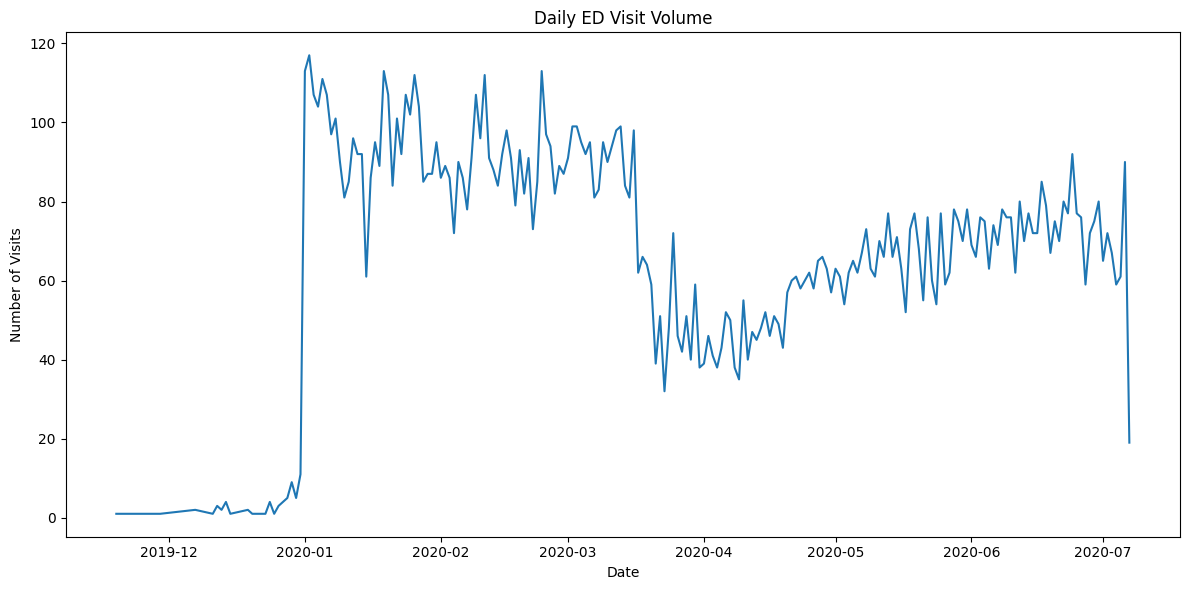

In [21]:
# Daily ED Visits Line Chart
df['start_dt_tm'] = pd.to_datetime(df['start_dt_tm'])
df['visit_day'] = df['start_dt_tm'].dt.date
daily_visits = df.groupby('visit_day').size()

plt.figure(figsize=(12,6))
daily_visits.plot(title="Daily ED Visit Volume", xlabel="Date", ylabel="Number of Visits")
plt.tight_layout()
plt.show()


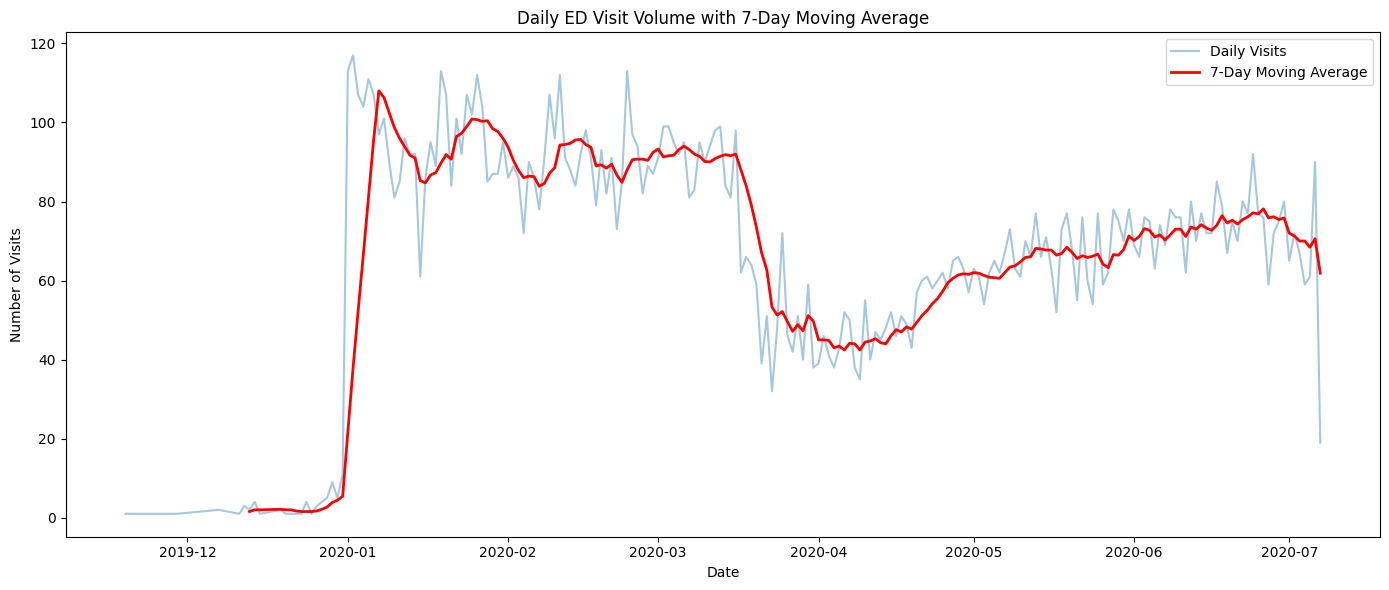

In [22]:
# Convert to datetime and extract date only
df['start_dt_tm'] = pd.to_datetime(df['start_dt_tm'], errors='coerce')
df['visit_day'] = df['start_dt_tm'].dt.date

# Group by visit_day to get raw daily counts
daily_visits = df.groupby('visit_day').size().sort_index()

# Calculate 7-day moving average
moving_avg = daily_visits.rolling(window=7).mean()

# Plot both raw data and moving average
plt.figure(figsize=(14,6))
plt.plot(daily_visits, label='Daily Visits', alpha=0.4)
plt.plot(moving_avg, label='7-Day Moving Average', color='red', linewidth=2)
plt.title("Daily ED Visit Volume with 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Number of Visits")
plt.legend()
plt.tight_layout()
plt.show()

Daily ED Visit Volume (Dec 2019 – July 2020)

Summary of Observations

This chart presents the number of Emergency Department (ED) visits per day, providing a foundational view of patient volume trends between late 2019 and mid-2020. Several meaningful patterns emerge from this data:

Key Observations

Steady Low Visits Before 2020:

ED visit counts were near zero before mid-December 2019. This likely reflects either the start of data collection or an early test phase with incomplete logging.

Sharp Spike in Early January 2020:

There is a sudden rise to over 100 visits per day starting in early January. This marks the onset of consistent data capture and serves as a reasonable baseline for modeling.

COVID-19 Drop in March–April 2020:

A clear decline is observed in March 2020, dropping to around 60 visits per day. This period coincides with public health lockdowns and reflects reduced ED utilization during the early stages of the COVID-19 pandemic.

Gradual Rebound by June 2020:

Following the pandemic dip, ED visits begin to recover steadily. By June, daily visit counts stabilize between 60 and 90 visits per day.

Spiky Fluctuations Throughout:

The chart shows frequent day-to-day variability, which may result from:

Weekday vs. weekend dynamics

Reporting lags

Seasonal or holiday effects (e.g., Easter, Canada Day)

Why This Matters for the Project?

This visualization offers key insights to guide the modeling strategy:

Baseline Period Identified:

Meaningful and complete data begins from January 2020, suggesting that records before this date may be excluded to avoid bias.

COVID-19 Period Flagging:

The March–May 2020 window represents a significant external shock. Creating a binary feature such as is_pandemic_period can help the model account for system-level disruptions.

Volatility Suggests Aggregation:

Given the high day-to-day variability, it may be beneficial to aggregate data weekly or apply a moving average to stabilize inputs.

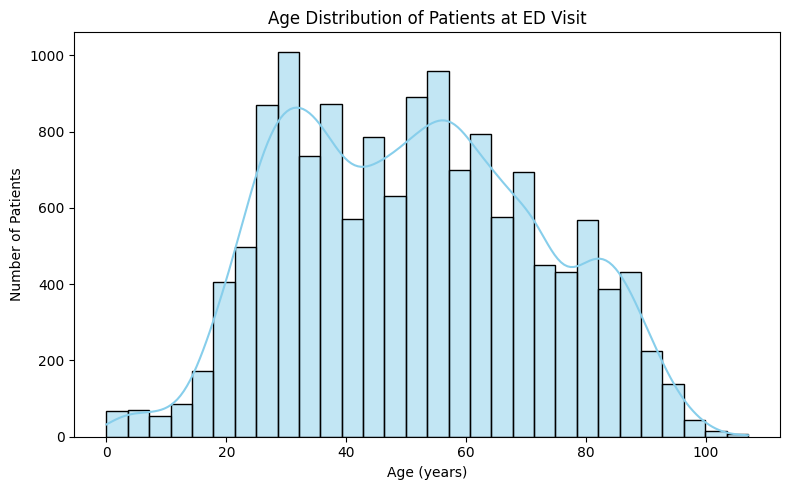

This plot shows the age distribution of patients visiting the ED. It helps identify age groups with higher ED utilization.


In [23]:
# Distribution of Patient Age
plt.figure(figsize=(8, 5))
sns.histplot(df['age_at_start_date'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Patients at ED Visit')
plt.xlabel('Age (years)')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# Description:
print("This plot shows the age distribution of patients visiting the ED. It helps identify age groups with higher ED utilization.")

This histogram displays the distribution of patients' ages at the time of their Emergency Department (ED) visits. The kde=True option overlays a kernel density estimate, giving a smoothed curve that highlights the underlying shape of the age distribution.

The X-axis represents age in years, and the Y-axis shows the number of ED visits made by patients within each age group. Peaks in the histogram indicate age groups with higher ED utilization.

**Why This Visual Matters in an ED Modeling Project Target Population?**

Identification By revealing which age groups are most frequently using emergency services, healthcare planners can better understand which demographics drive ED demand. For instance, a spike in elderly patients might indicate a need for geriatric care protocols, while higher visits by children could lead to pediatric resource allocations. Resource Allocation & Staffing Knowing age patterns helps model the expected complexity of cases. Older patients often have comorbidities requiring more time and specialized care. This insight aids in capacity planning, triage protocols, and predictive staffing models. Healthcare Policy Implications If younger populations are heavily using EDs for non-emergency issues, the plot could highlight gaps in primary or urgent care availability, influencing policy changes or education campaigns to reroute non-urgent cases. Machine Learning Feature Importance Age is a key predictive feature in ED models that forecast admission, wait times, revisit probability, or mortality risk. Understanding its distribution helps ensure that models aren’t skewed toward minority groups, ensuring model fairness and performance.

**Conclusions**

If the age distribution is skewed toward older adults, your ED model may need to account for longer visits, higher admission rates, and increased likelihood of inpatient care. If there’s a bimodal distribution (e.g., many young children and elderly), it suggests two major patient populations requiring distinct clinical workflows. A uniform distribution would suggest a general community-wide utilization pattern, possibly indicating broader public reliance on ED for various age-based health needs.

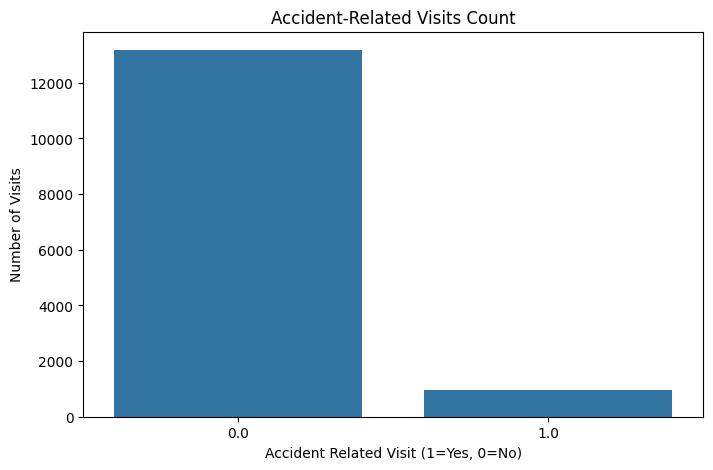

In [12]:
#  Bar Plot: Count of Visits Related to Accidents
plt.figure(figsize=(8, 5))
sns.countplot(x='accident_related_visit_flag', data=df)
plt.title("Accident-Related Visits Count")
plt.xlabel("Accident Related Visit (1=Yes, 0=No)")
plt.ylabel("Number of Visits")
# Explanation:
# This bar plot helps quantify how many emergency visits were related to accidents.
# It’s crucial for understanding how much burden accidental injuries place on the ED system.
plt.show()

Why It Matters in an ED Modeling Project Quantifying Trauma-Related Burden Accidental injuries (e.g., falls, vehicle crashes, workplace accidents) can significantly strain emergency services. Knowing the volume of such visits helps in: Forecasting demand for trauma care Staffing (trauma surgeons, orthopedic specialists) Designing triage protocols for rapid response Resource Planning & Optimization Accident-related visits often require more complex care, including imaging, orthopedic assessments, and surgical interventions.

This insight allows: Better resource allocation (e.g., trauma bays, diagnostics) Budgeting for accident-prone seasons or events Preventive Public Health Strategy If accident-related cases are high, public health initiatives may be needed to reduce preventable injuries. Insights from this data can influence: Policy recommendations (e.g., road safety campaigns) Community outreach programs for injury prevention Modeling Specialized Patient Flows Accident-related patients typically follow different care pathways (e.g., trauma codes, imaging protocols). Knowing their proportion helps build more realistic simulation models or machine learning classifiers for patient triage and flow.

 **Conclusions**

 You Can Draw A high number of accident-related visits suggests significant ED resource allocation toward trauma care. This might justify investment in a dedicated trauma unit or fast-track protocol. If accident-related visits are less frequent, it may indicate that other chronic or medical causes dominate ED demand, reshaping how you model patient pathways.

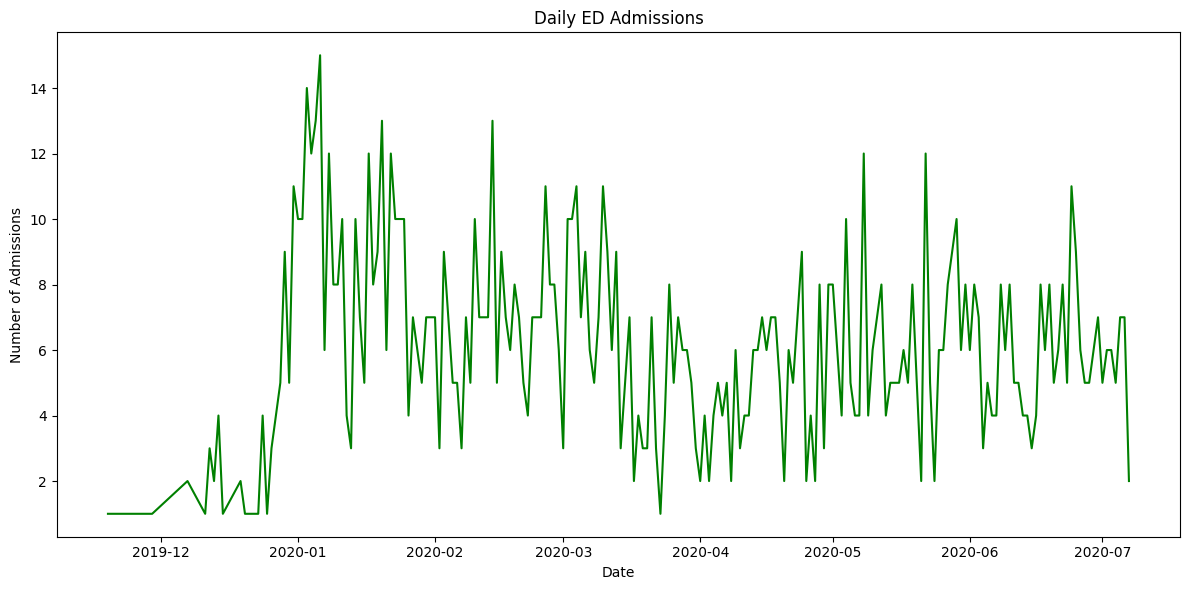

In [24]:
# Daily Admissions Line Chart
# ----------------------
if 'is_admitted' in df.columns:
    daily_admits = df[df['is_admitted'] == 1].groupby('visit_day').size()
    plt.figure(figsize=(12,6))
    daily_admits.plot(title="Daily ED Admissions", xlabel="Date", ylabel="Number of Admissions", color='green')
    plt.tight_layout()
    plt.show()


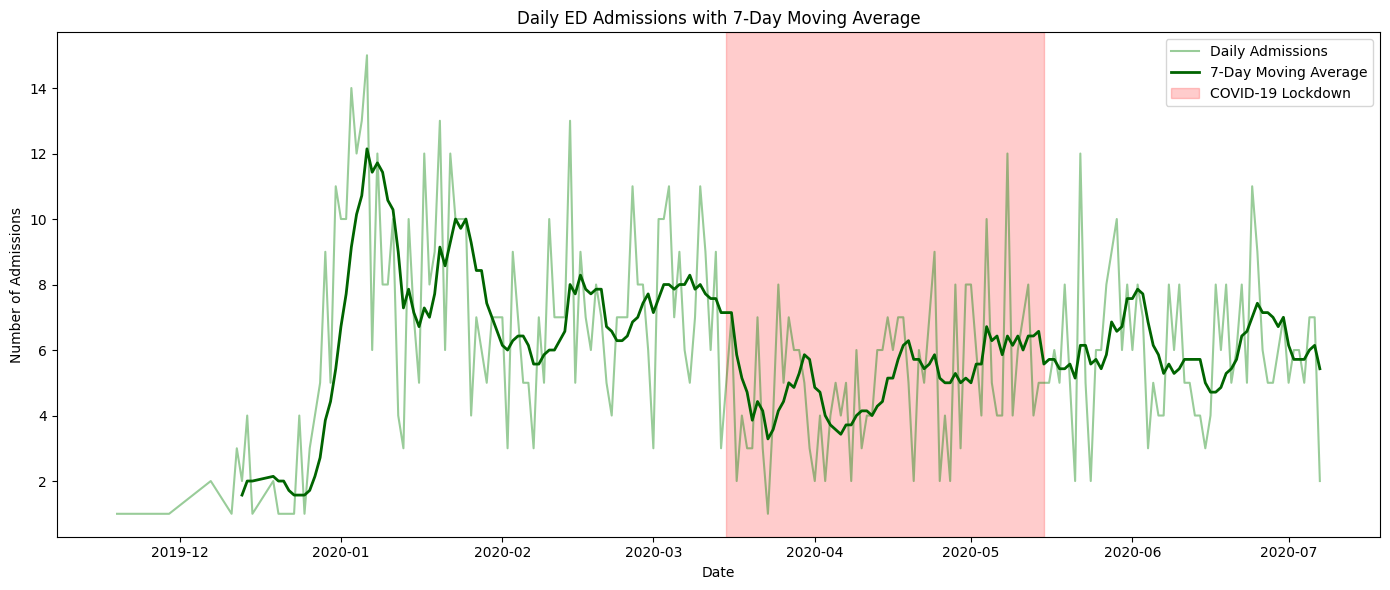

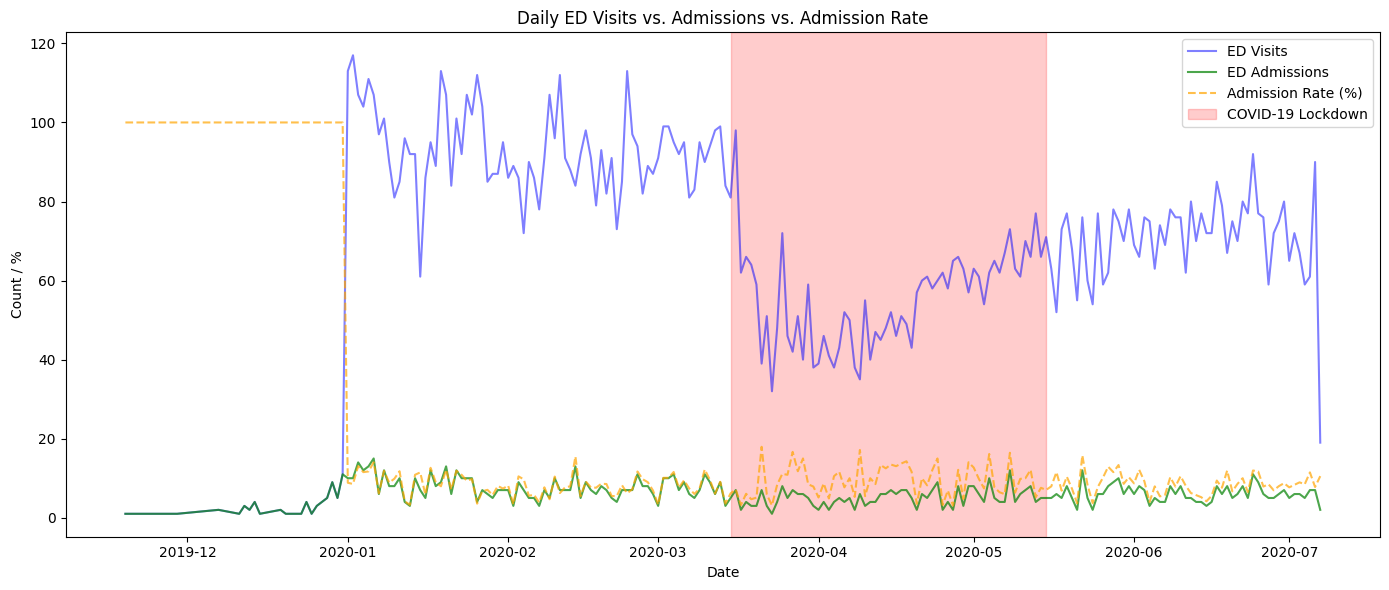

In [25]:
# Ensure datetime conversion
df['start_dt_tm'] = pd.to_datetime(df['start_dt_tm'], errors='coerce')
df['visit_day'] = df['start_dt_tm'].dt.date

# ----------------------
# 1. Smoothed Daily Admissions Chart
# ----------------------
if 'is_admitted' in df.columns:
    daily_admits = df[df['is_admitted'] == 1].groupby('visit_day').size().sort_index()
    moving_admits = daily_admits.rolling(window=7).mean()

    plt.figure(figsize=(14,6))
    plt.plot(daily_admits, label='Daily Admissions', alpha=0.4, color='green')
    plt.plot(moving_admits, label='7-Day Moving Average', color='darkgreen', linewidth=2)
    plt.axvspan(pd.to_datetime("2020-03-15"), pd.to_datetime("2020-05-15"), color='red', alpha=0.2, label="COVID-19 Lockdown")
    plt.title("Daily ED Admissions with 7-Day Moving Average")
    plt.xlabel("Date")
    plt.ylabel("Number of Admissions")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ----------------------
# Dual-Line Plot: Visits vs. Admissions vs. Admission Rate
# ----------------------
daily_visits = df.groupby('visit_day').size().sort_index()
daily_admits = df[df['is_admitted'] == 1].groupby('visit_day').size().sort_index()

# Align both series
combined = pd.concat([daily_visits, daily_admits], axis=1)
combined.columns = ['Visits', 'Admissions']
combined.fillna(0, inplace=True)
combined['Admission Rate (%)'] = (combined['Admissions'] / combined['Visits']) * 100

plt.figure(figsize=(14,6))
plt.plot(combined['Visits'], label='ED Visits', alpha=0.5, color='blue')
plt.plot(combined['Admissions'], label='ED Admissions', alpha=0.7, color='green')
plt.plot(combined['Admission Rate (%)'], label='Admission Rate (%)', alpha=0.7, color='orange', linestyle='--')
plt.axvspan(pd.to_datetime("2020-03-15"), pd.to_datetime("2020-05-15"), color='red', alpha=0.2, label="COVID-19 Lockdown")
plt.title("Daily ED Visits vs. Admissions vs. Admission Rate")
plt.xlabel("Date")
plt.ylabel("Count / %")
plt.legend()
plt.tight_layout()
plt.show()

**Daily ED Admissions (Dec 2019 – July 2020)**

**Summary of Observations**

This chart displays the number of Emergency Department (ED) patients admitted to inpatient wards per day, covering the period from December 2019 to July 2020. The data reveals important trends in patient admissions, critical to understanding operational pressures and shaping predictive modeling targets.

**Key Observations**

*Low Activity Before January 2020:*

The number of admissions remained very low prior to January 2020. This aligns with earlier findings from the ED visit chart and confirms that full data capture begins in early 2020.

*Spike in Admissions in Early 2020:*

A sharp rise in daily admissions is observed from January through February 2020, with peaks reaching 13–15 patients per day. This likely corresponds to:

Peak flu season

Increased respiratory-related cases

Hospital systems fully engaging electronic data logging

*March–April Decline Due to COVID-19:*

A noticeable drop occurs during March and April 2020, mirroring the decline in ED visits. This aligns with the early COVID-19 lockdown period, where patients may have delayed seeking care, and hospitals reduced elective admissions.

*Irregular Recovery Post-COVID Onset:*

Unlike the gradual rebound in ED visits, daily admissions show greater volatility and lack a clear upward trend after April. This suggests:

Shifts in hospital policy or triage protocols

Limited inpatient capacity or staff availability

Dynamic decision-making due to pandemic uncertainty

*Consistent Variability Throughout:*

Daily admission counts vary between 4 and 12 patients, with noticeable fluctuations. Possible contributing factors include:

Weekday-weekend effects (e.g., fewer admissions on weekends)

Bed availability or staffing constraints

**Why This is Important for the Project**

*Defines the Target Variable:*

This chart represents the actual outcome you are forecasting — the number of daily ED-to-inpatient admissions.

*Reveals Key Predictive Drivers:*

Modeling this trend will involve leveraging time-sensitive and clinical features, such as:

Chief complaint category

CTAS acuity level

Time of day and arrival method

*Highlights Non-Stationarity:*

Significant disruptions during the pandemic (March–May 2020) indicate that the admissions pattern is non-stationary and may require:

A COVID-19 flag in the model

Use of rolling averages or weekly aggregation to stabilize prediction targets




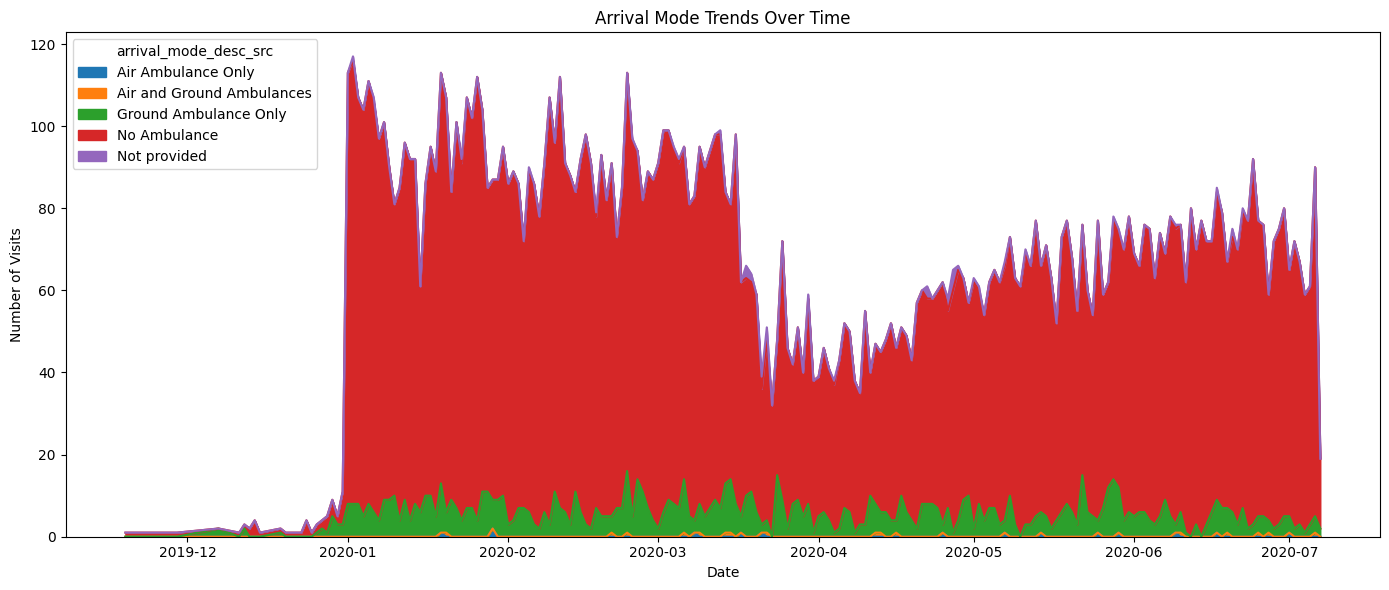

In [26]:
# Stacked Area Chart by Arrival Mode
# ----------------------
if 'arrival_mode_desc_src' in df.columns:
    arrival_trend = df.groupby(['visit_day', 'arrival_mode_desc_src']).size().unstack().fillna(0)
    arrival_trend.plot.area(stacked=True, figsize=(14,6), title='Arrival Mode Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Visits')
    plt.tight_layout()
    plt.show()


Trends in Emergency Department (ED) arrival modes from Dec 2019 to July 2020. The majority of patients arrived without ambulance transport. A marked decrease in all modes is observed during the COVID-19 lockdown period (March–April 2020), followed by gradual recovery. Ground ambulance and air ambulance modes consistently form a small but clinically significant subset of visits.



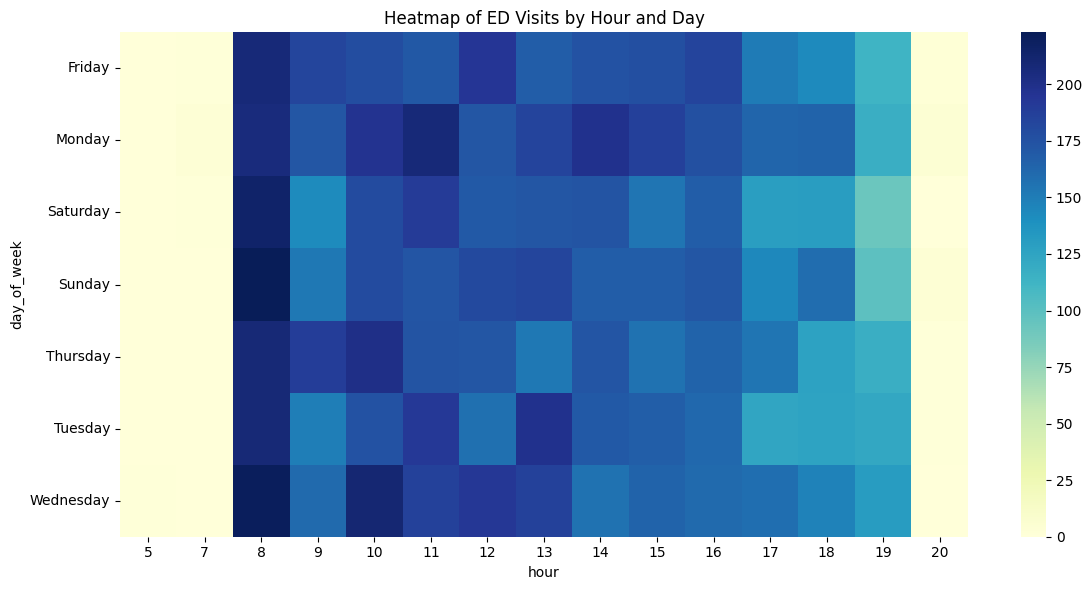

In [27]:
# Hour of Day Heatmap
df['hour'] = df['start_dt_tm'].dt.hour
df['day_of_week'] = df['start_dt_tm'].dt.day_name()
hourly_counts = df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(hourly_counts, cmap="YlGnBu")
plt.title("Heatmap of ED Visits by Hour and Day")
plt.tight_layout()
plt.show()


Heatmap of ED Visits by Hour and Day of Week

Summary of Observations

This heatmap visualizes the density of Emergency Department (ED) visits across hours of the day, broken down by day of the week. The x-axis represents hourly time blocks (from approximately 5:00 AM to 8:00 PM), while the y-axis represents each day of the week from Monday to Sunday.

Color intensity reflects the volume of visits, with darker shades representing higher visit volumes, and lighter shades representing fewer visits. The chart reveals both hourly and weekly patterns in patient arrival behavior.

Key Observations

Consistent Morning Surge (~8:00 AM):

Every day of the week shows a distinct peak in ED visits around 8:00 AM. This trend is especially pronounced on Fridays, Sundays, and Wednesdays, indicating early-morning resource demand and potentially high triage volume.

Low Visit Volumes in Early Morning and Late Evening:

Visits are noticeably lower before 7:00 AM and after 8:00 PM across all days. These time windows reflect ED off-peak hours and may align with typical patient behavior and hospital scheduling norms.

Afternoon Decline (~4:00 PM):

Most days show a tapering off of visit counts after 4:00 PM. This could be due to fewer clinic referrals late in the day or patients deferring care until the next morning. Operational cutoffs and inpatient bed transitions may also play a role.

Weekend Distribution Differences:

Sundays appear to have a broader distribution of visits through mid-to-late morning, possibly reflecting the lack of primary care access on weekends and increased walk-in volumes.

Why This Matters for the Project

Improves Temporal Feature Engineering:

This chart supports the creation of engineered time-based features like:

hour_of_day

day_of_week

is_peak_hour These features can help predict patient volume or likelihood of admission.

Informs Operational Planning Models:

Identifying consistent peak hours helps inform nurse staffing schedules, physician coverage, and triage preparedness, especially in the 7–9 AM window.

Supports Time-Based Model Stratification:

Modeling efforts can be enhanced by segmenting the data by time-of-day blocks, or by training models separately for peak vs. off-peak hours to increase forecast precision.

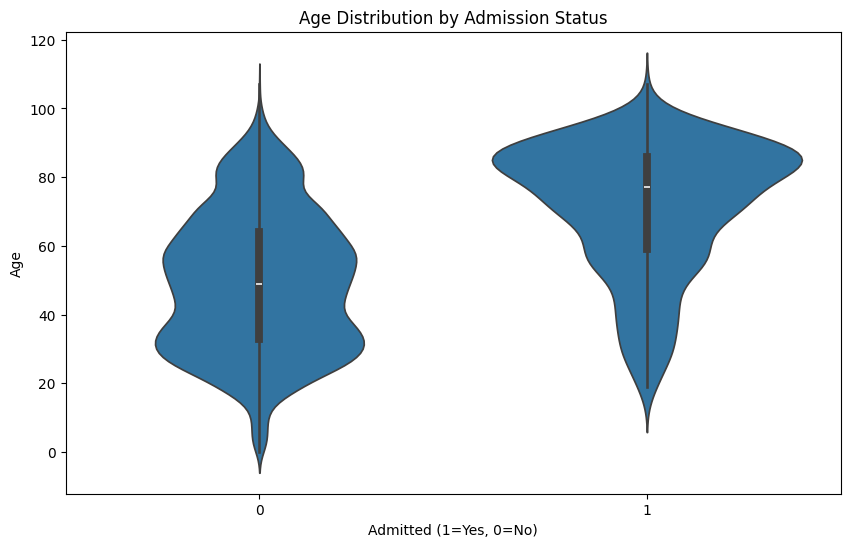

In [13]:
# Violin Plot: Age Distribution by Admission Status
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_admit_within_target', y='age_at_start_date', data=df)
plt.title("Age Distribution by Admission Status")
plt.xlabel("Admitted (1=Yes, 0=No)")
plt.ylabel("Age")
# Explanation:
# This violin plot visualizes the age distribution among admitted and non-admitted patients.
# It highlights whether older patients are more likely to be admitted, which informs triage and capacity planning.
plt.show()

The violin plot combines a box plot and a kernel density estimate, showing the distribution of ages for two groups of patients:

Those admitted within the target time (1) Those not admitted within the target (0) It helps detect:

Median ages Variability in age groups Skewness or bimodal distributions

**Why It Matters in an ED Modeling Project?**

Age-Based Admission Trends Older adults often have more complex health needs. If the plot shows higher median ages or wider age distributions among those admitted, it implies: Elderly patients are more likely to be admitted and quickly triaged. Age can be a strong predictive variable for ED disposition in machine learning models. Resource & Capacity Planning Understanding age dynamics helps anticipate: Bed occupancy rates (older patients may require longer stays) Need for geriatric-focused care pathways, such as fall prevention or cognitive assessments Triage Effectiveness & Prioritization If younger patients are not being admitted within target time but older ones are, it may validate that triage is prioritizing correctly. Alternatively, if elderly patients aren’t admitted within targets, this may reveal a system bottleneck. Modeling Admission Time Targets For ED simulation or predictive modeling, age is a valuable feature: Predict likelihood of admission Predict time to admission and downstream events

**Conclusions**

We can draw a wider distribution of age in the admitted group suggests broad age variability, implying diverse patient needs in admitted populations. If the median age is higher in the admitted group, ED systems might be correctly prioritizing elderly care. A narrow age band in admitted patients could point to age-based disparities or biased triage protocols. This insight can inform policy decisions, like introducing an age-adjusted triage score or dedicated geriatric care team.

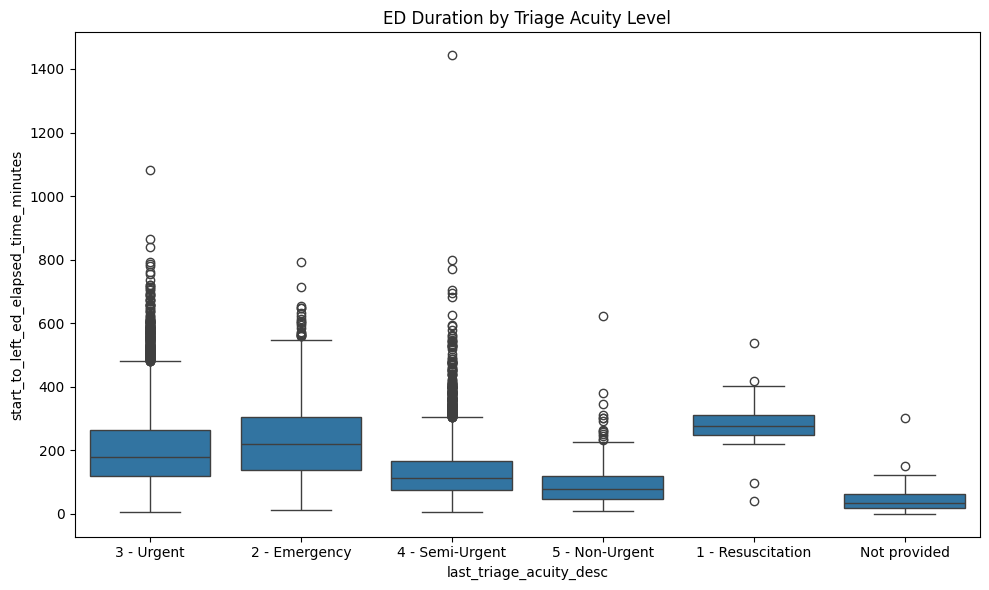

In [28]:
# Boxplot: ED Duration by Acuity
# ----------------------
if 'last_triage_acuity_desc' in df.columns and 'start_to_left_ed_elapsed_time_minutes' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='last_triage_acuity_desc', y='start_to_left_ed_elapsed_time_minutes', data=df)
    plt.title("ED Duration by Triage Acuity Level")
    plt.tight_layout()
    plt.show()


Boxplot of Emergency Department (ED) duration in minutes by triage acuity level. Higher-acuity patients (CTAS 1 and 2) tend to have longer and more variable stays, reflecting the complexity of care. Lower-acuity patients (CTAS 4 and 5) are generally seen and discharged more quickly. This chart highlights the predictive power of triage in modeling patient flow and ED resource needs.

<ipython-input-14-a72d8abf85e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='last_triage_acuity_desc', y='age_at_start_date', data=df, palette='Set3')


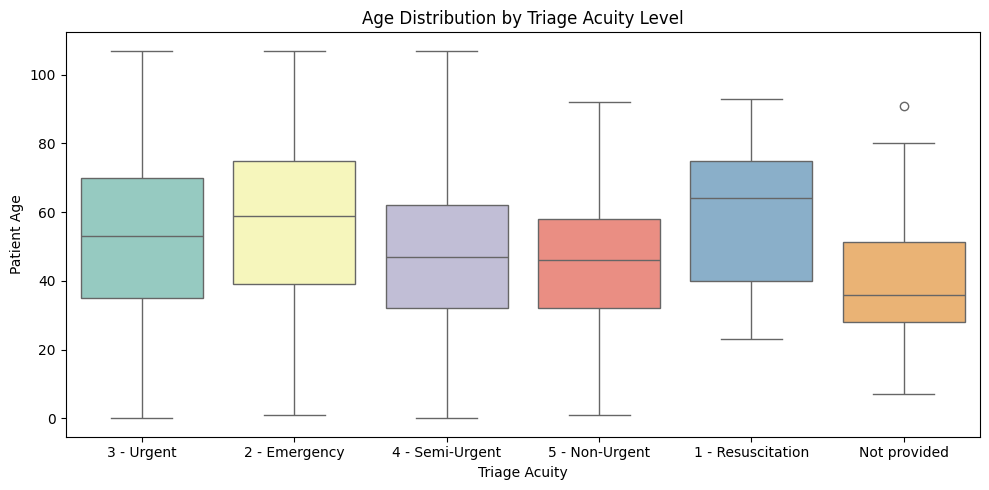

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='last_triage_acuity_desc', y='age_at_start_date', data=df, palette='Set3')
plt.title("Age Distribution by Triage Acuity Level")
plt.xlabel("Triage Acuity")
plt.ylabel("Patient Age")
plt.tight_layout()
plt.show()

**Why It Matters in an ED Modeling Project?**

Quantifying Trauma-Related Burden Accidental injuries (e.g., falls, vehicle crashes, workplace accidents) can significantly strain emergency services. Knowing the volume of such visits helps in: Forecasting demand for trauma care Staffing (trauma surgeons, orthopedic specialists) Designing triage protocols for rapid response Resource Planning & Optimization Accident-related visits often require more complex care, including imaging, orthopedic assessments, and surgical interventions. This insight allows: Better resource allocation (e.g., trauma bays, diagnostics) Budgeting for accident-prone seasons or events Preventive Public Health Strategy If accident-related cases are high, public health initiatives may be needed to reduce preventable injuries. Insights from this data can influence: Policy recommendations (e.g., road safety campaigns) Community outreach programs for injury prevention Modeling Specialized Patient Flows Accident-related patients typically follow different care pathways (e.g., trauma codes, imaging protocols). Knowing their proportion helps build more realistic simulation models or machine learning classifiers for patient triage and flow. 📌

**Conclusions**

 We can draw a high number of accident-related visits suggests significant ED resource allocation toward trauma care. This might justify investment in a dedicated trauma unit or fast-track protocol. If accident-related visits are less frequent, it may indicate that other chronic or medical causes dominate ED demand, reshaping how you model patient pathways.

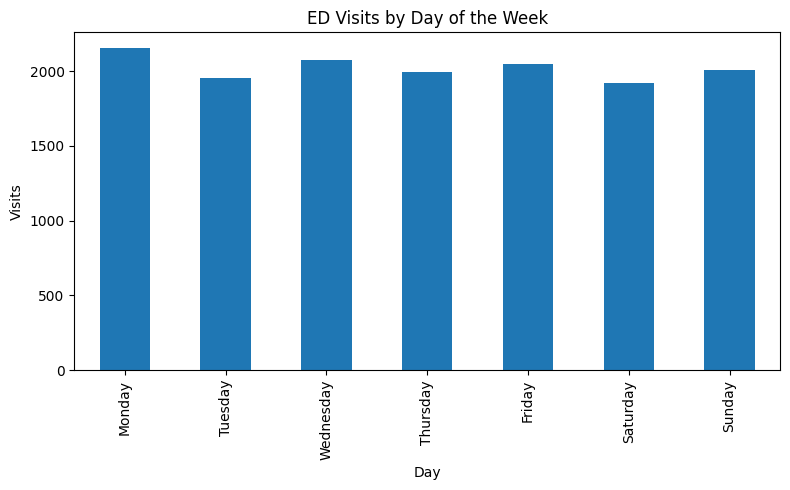

In [29]:
# Bar Plot: Visits by Day of Week
# ----------------------
df['weekday'] = df['start_dt_tm'].dt.day_name()
plt.figure(figsize=(8,5))
df['weekday'].value_counts().loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot(kind='bar')
plt.title("ED Visits by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Visits")
plt.tight_layout()
plt.show()


Total Emergency Department (ED) visits by day of the week. Mondays consistently record the highest volume of ED visits, followed by midweek days. The weekend shows a slight decline in visits, with Saturday being the lowest. This distribution suggests patients may defer non-urgent care until weekdays and emphasizes the importance of operational readiness on Monday mornings.

Interestingly, while most weekdays show high and consistent ED volume, Tuesday emerges as a slight outlier with reduced visits. This deviation from the weekday norm may reflect a lag in patient behavior following Monday surges, and could suggest both an operational ‘cool-off’ and a feature worthy of attention in predictive models.

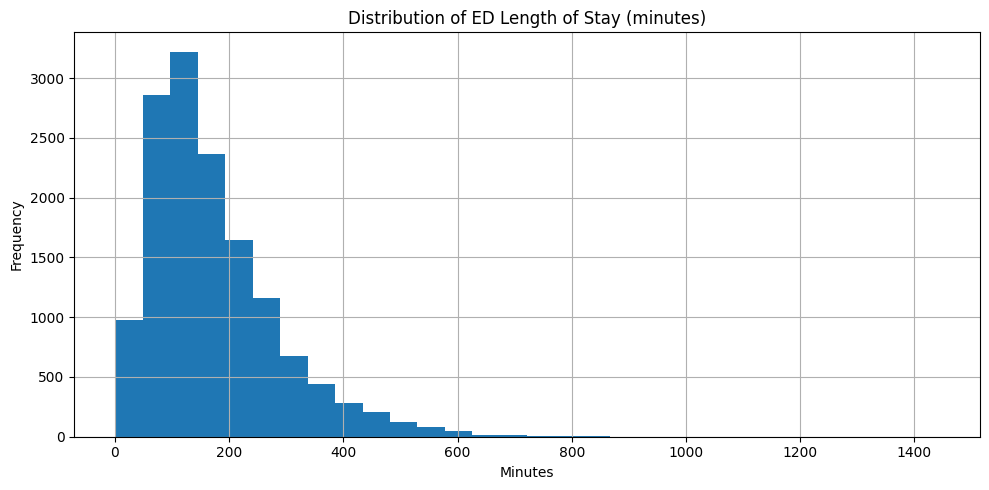

In [30]:
# Histogram of ED Length of Stay
# ----------------------
if 'start_to_left_ed_elapsed_time_minutes' in df.columns:
    plt.figure(figsize=(10,5))
    df['start_to_left_ed_elapsed_time_minutes'].dropna().hist(bins=30)
    plt.title("Distribution of ED Length of Stay (minutes)")
    plt.xlabel("Minutes")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


 Histogram of Emergency Department (ED) length of stay in minutes. The distribution is right-skewed, with most patients staying under 300 minutes. A small number of cases remain for extended periods (600+ minutes), which likely represent high-acuity or complex situations. This distribution supports categorizing LOS for modeling and highlights the operational importance of reducing long-stay cases to improve throughput.

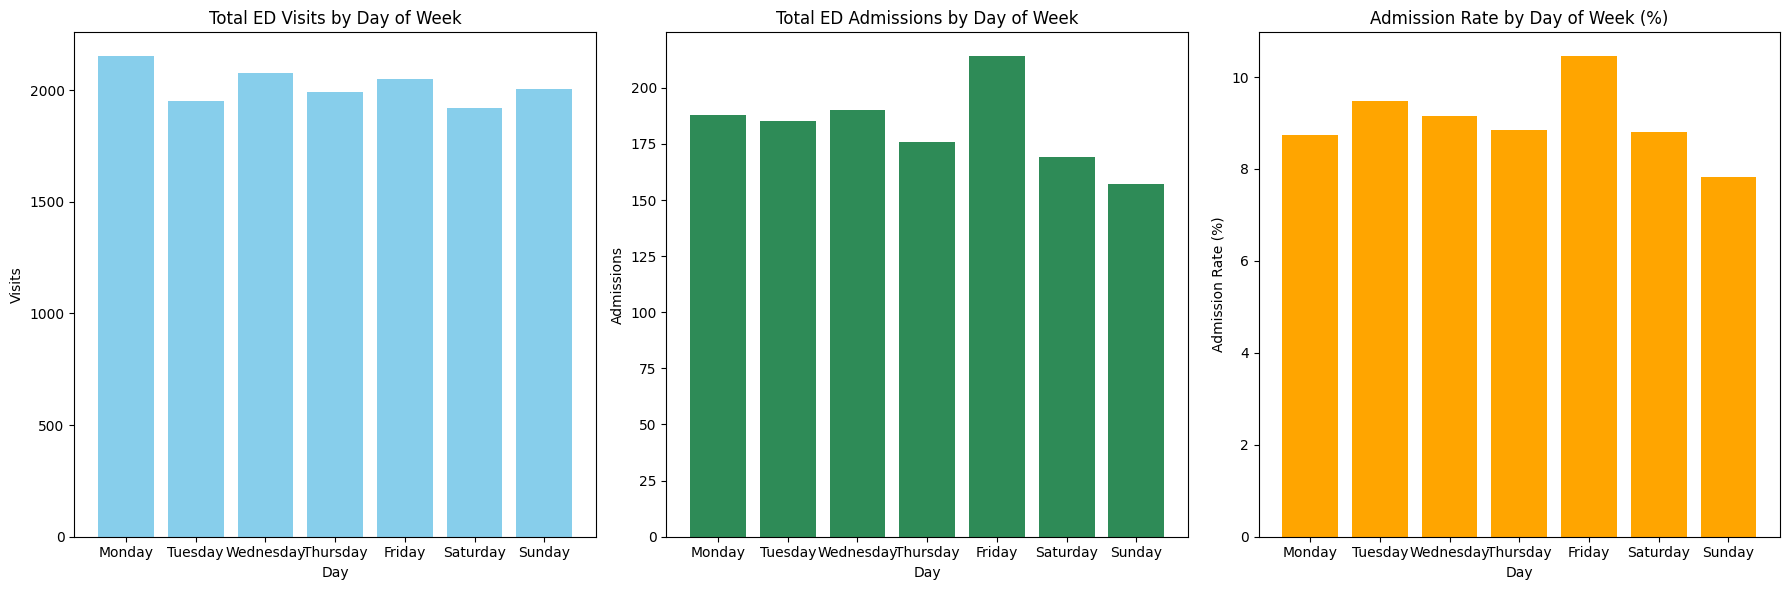

In [34]:
# Convert datetime and extract weekday
df['start_dt_tm'] = pd.to_datetime(df['start_dt_tm'], errors='coerce')
df['weekday'] = df['start_dt_tm'].dt.day_name()

# Count visits per weekday
visit_counts = df['weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Count admissions per weekday
if 'is_admitted' in df.columns:
    admit_counts = df[df['is_admitted'] == 1]['weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

    # Compute admission rate (%)
    admission_rate = (admit_counts / visit_counts) * 100

    # Create side-by-side plots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    axs[0].bar(visit_counts.index, visit_counts.values, color='skyblue')
    axs[0].set_title("Total ED Visits by Day of Week")
    axs[0].set_ylabel("Visits")

    axs[1].bar(admit_counts.index, admit_counts.values, color='seagreen')
    axs[1].set_title("Total ED Admissions by Day of Week")
    axs[1].set_ylabel("Admissions")

    axs[2].bar(admission_rate.index, admission_rate.values, color='orange')
    axs[2].set_title("Admission Rate by Day of Week (%)")
    axs[2].set_ylabel("Admission Rate (%)")

    for ax in axs:
        ax.set_xlabel("Day")

    plt.tight_layout()
    plt.show()



Weekly comparison of ED activity showing total visits, admissions, and admission rate per day. While Monday leads in overall volume, Friday shows the highest admission rate, indicating increased severity. Sunday has both low volume and admission rate, suggesting a predominance of low-acuity cases. These insights are critical for resource allocation, triage planning, and predictive feature selection.



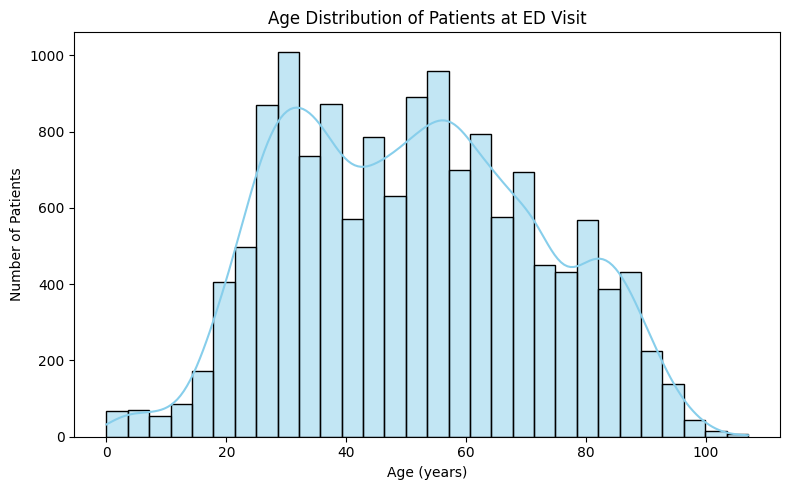

This plot shows the age distribution of patients visiting the ED. It helps identify age groups with higher ED utilization.


In [31]:
# Distribution of Patient Age
plt.figure(figsize=(8, 5))
sns.histplot(df['age_at_start_date'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Patients at ED Visit')
plt.xlabel('Age (years)')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# Description:
print("This plot shows the age distribution of patients visiting the ED. It helps identify age groups with higher ED utilization.")

This histogram displays the distribution of patients' ages at the time of their Emergency Department (ED) visits. The kde=True option overlays a kernel density estimate, giving a smoothed curve that highlights the underlying shape of the age distribution.

The X-axis represents age in years, and the Y-axis shows the number of ED visits made by patients within each age group. Peaks in the histogram indicate age groups with higher ED utilization.

Why This Visual Matters in an ED Modeling Project Target Population Identification By revealing which age groups are most frequently using emergency services, healthcare planners can better understand which demographics drive ED demand. For instance, a spike in elderly patients might indicate a need for geriatric care protocols, while higher visits by children could lead to pediatric resource allocations. Resource Allocation & Staffing Knowing age patterns helps model the expected complexity of cases. Older patients often have comorbidities requiring more time and specialized care. This insight aids in capacity planning, triage protocols, and predictive staffing models. Healthcare Policy Implications If younger populations are heavily using EDs for non-emergency issues, the plot could highlight gaps in primary or urgent care availability, influencing policy changes or education campaigns to reroute non-urgent cases. Machine Learning Feature Importance Age is a key predictive feature in ED models that forecast admission, wait times, revisit probability, or mortality risk. Understanding its distribution helps ensure that models aren’t skewed toward minority groups, ensuring model fairness and performance.

Conclusions If the age distribution is skewed toward older adults, your ED model may need to account for longer visits, higher admission rates, and increased likelihood of inpatient care. If there’s a bimodal distribution (e.g., many young children and elderly), it suggests two major patient populations requiring distinct clinical workflows. A uniform distribution would suggest a general community-wide utilization pattern, possibly indicating broader public reliance on ED for various age-based health needs.

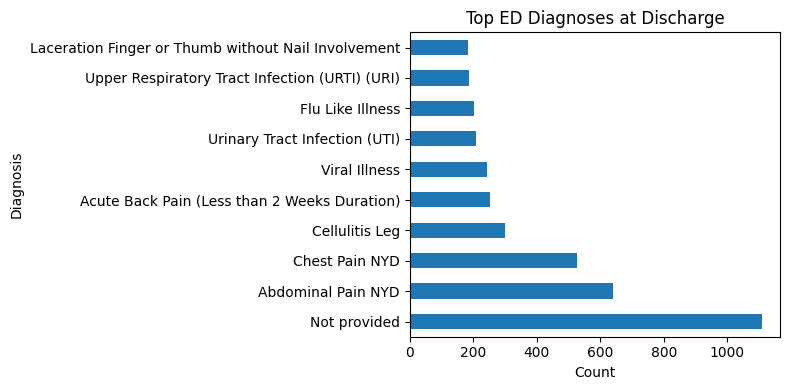

In [15]:
plt.figure(figsize=(8, 4))
df['disch_ed_dx_1_desc'].value_counts().head(10).plot(kind='barh')
plt.title('Top ED Diagnoses at Discharge')
plt.xlabel('Count')
plt.ylabel('Diagnosis')
plt.tight_layout()
plt.show()


This horizontal bar chart shows the 10 most frequent discharge diagnoses based on the disch_ed_dx_1_desc column. The Y-axis lists the diagnosis descriptions (e.g., "Abdominal Pain", "Upper Respiratory Infection"), and the X-axis represents how many times each diagnosis appeared in the dataset.

By using value_counts().head(10), we focus only on the most prevalent clinical presentations, making the chart cleaner and more focused for decision-making.

**Why This Visual Matters in an ED Modeling Project?**

Understanding ED Demand Composition This chart reveals what types of conditions most commonly lead to ED visits and subsequent discharge. Recognizing these patterns is essential for: Planning specialty staffing (e.g., respiratory therapists, orthopedists) Ensuring equipment availability (e.g., imaging machines for fractures) Tailoring clinical pathways or protocols Model Target Identification If you’re building predictive models (e.g., likelihood of admission, resource usage), knowing the most common diagnoses helps select target conditions for specialized models or simulations. Resource Allocation and Workflow Optimization Certain diagnoses are quicker to treat, while others need extended observation or complex diagnostics. This insight guides: Triage efficiency improvements Resource optimization Queue modeling for common conditions Seasonality & Public Health Surveillance Common diagnoses like flu, viral infections, or gastroenteritis may fluctuate seasonally. Frequent tracking helps in surge prediction and public health alerts.

**Conclusions**

We can draw diagnoses that dominate the ED discharge list likely consume a large portion of ED resources. These can become priority candidates for fast-track care protocols. A high volume of non-emergency conditions may indicate inappropriate ED usage, pointing to system-level issues like limited access to primary care. If certain high-risk conditions (e.g., chest pain, shortness of breath) appear frequently but result in discharge, it raises questions about diagnostic thresholds, revisit risks, and model thresholds for admission prediction.

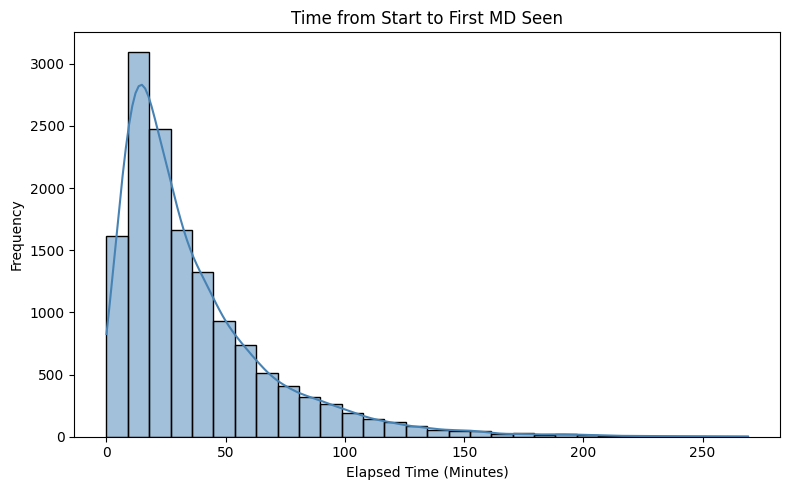

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['start_to_first_md_seen_tracking_event_elapsed_time_minutes'],
             bins=30, kde=True, color='steelblue')
plt.title("Time from Start to First MD Seen")
plt.xlabel("Elapsed Time (Minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

X-axis: Time (in minutes) from arrival/start to being seen by a physician. Y-axis: Number of patients for each time interval. Histogram bars: Frequency of elapsed time ranges. KDE curve: Smooth representation of the distribution to highlight patterns. 🔍 Why It Matters for ED Modeling Projects Operational Efficiency Insight This visual highlights how quickly patients get access to a physician after arrival. Helps assess performance of triage, staffing, and physician availability. Target Time Compliance Many EDs aim for targets (e.g., CTAS 1–2 seen within 15–30 minutes). The plot reveals whether real-world practice aligns with clinical guidelines. Bottleneck Identification A long tail suggests a subset of patients experience long waits. Pinpointing these delays supports queue optimization, workflow redesign, and resource reallocation. Predictive Modeling Feature Time-to-MD is a key predictor of patient outcomes, length of stay, and satisfaction. Can be used in models to forecast admission risk, treatment delays, or revisit likelihood. Quality of Care Evaluation Delays in initial assessment can correlate with worse clinical outcomes. Tracking this metric is essential for quality improvement programs.

**Conclusions**

We can draw if most patients are seen within 30 minutes, the ED is likely functioning efficiently under normal load. A bimodal or skewed distribution may indicate variability in performance based on time of day or triage level. A heavy right tail may suggest under-resourcing during certain shifts or surges in patient volume. If the KDE shows multiple peaks, you may consider segmenting by triage level or shift time to explain variation.

<ipython-input-18-09ef1f90100e>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


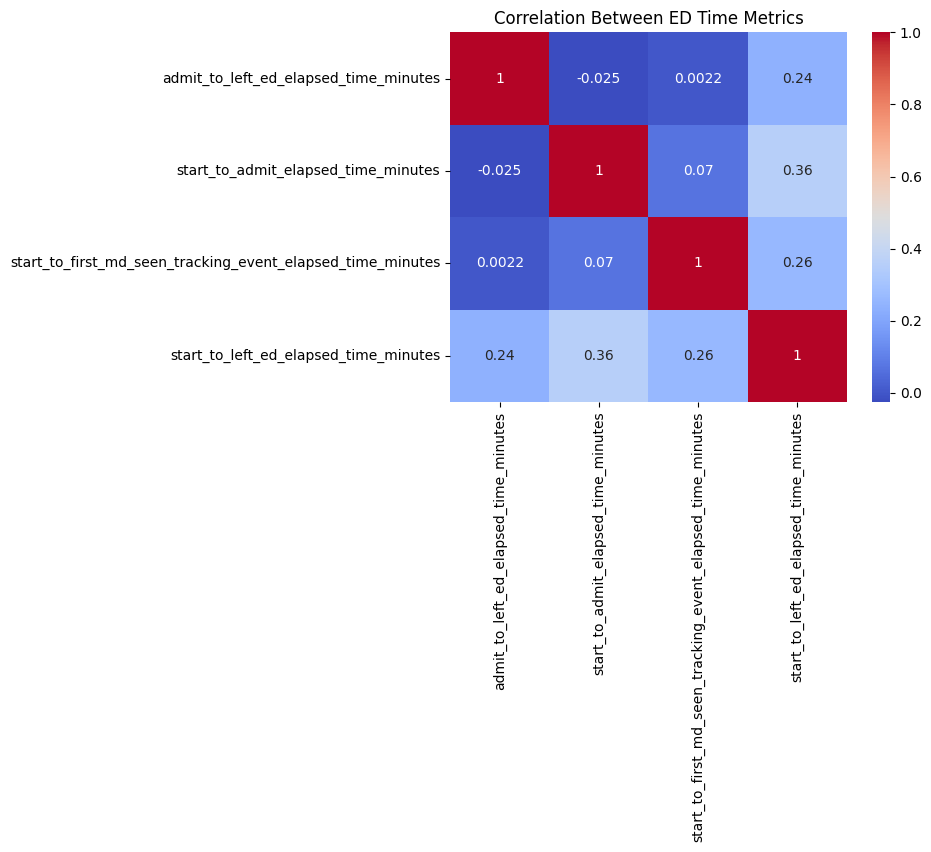

In [18]:
# Heatmap: Correlation Between Time Metrics ---------
# This heatmap reveals correlations between different time-based metrics like admission wait, total ED stay, etc.
# It is useful for identifying which processes might be contributing to ED delays.

time_cols = [
    'admit_to_left_ed_elapsed_time_minutes',
    'start_to_admit_elapsed_time_minutes',
    'start_to_first_md_seen_tracking_event_elapsed_time_minutes',
    'start_to_left_ed_elapsed_time_minutes'
]
corr_matrix = df[time_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between ED Time Metrics')
plt.tight_layout()
plt.show()

Heatmap uses color intensity to show pairwise correlations (Pearson correlation coefficients) between different time-based ED metrics. The metrics compared include: admit_to_left_ed_elapsed_time_minutes: Time from admission to leaving the ED start_to_admit_elapsed_time_minutes: Time from arrival to admission start_to_first_md_seen_tracking_event_elapsed_time_minutes: Time from arrival to first physician seen start_to_left_ed_elapsed_time_minutes: Total time in ED from arrival to discharge Each cell contains a value between -1 and 1:

1: Perfect positive correlation (as one increases, so does the other) 0: No correlation -1: Perfect negative correlation 🔍

**Why It Matters in an ED Modeling Project?**

Identify Redundant or Strongly Related Features High correlations indicate that some features might be redundant in machine learning models. For example: If start_to_admit and start_to_left_ed are very strongly correlated, one could be dropped or transformed. Inform Feature Engineering Knowing which times are linked helps construct derived features (e.g., time to doctor as a percentage of total ED stay). If start_to_first_md_seen and start_to_admit are highly correlated, it might mean early physician assessment speeds up admission. Understand Workflow Dynamics Correlation between start_to_first_md_seen and start_to_left_ed may reflect how early doctor access affects discharge speed. Weak correlation might indicate process fragmentation or delays in handoffs. Performance Bottleneck Analysis Low or negative correlation might expose bottlenecks or inefficiencies. For example, long waits to be seen might not always correlate with longer stays—implying possible improvement areas in fast-tracking or parallel processes. Simulation Modeling Inputs Correlated durations help in discrete event simulation to define time distributions and dependencies between patient flow stages.

**Conclusions**

We can draw high correlation between start_to_admit_elapsed_time_minutes and start_to_left_ed_elapsed_time_minutes suggests that earlier admission drives shorter total ED stay, indicating a potential leverage point for improving flow. Moderate correlation between start_to_first_md_seen and other metrics suggests that delays in physician assessment may be a contributor but not the sole driver of total ED time. These insights help focus improvement efforts on speeding up key events (e.g., early triage or fast-track admission) that could reduce ED overcrowding.